In [23]:
import matplotlib.pyplot as plt
import numpy as np
import d_evaluate
bs_bundle = d_evaluate.load_bootstrap()

In [24]:
from x_config import config  # TODO!
NUM_BINS = config['num_bins']
BINS = np.arange(NUM_BINS)


In [30]:
def plot_spectrum(true_spectrum, pred_spectrum, BINS, save=False):
    fig, axs = plt.subplots(2, 1, figsize=(10, 6))

    # plt.hist(BINS[:-1], BINS, weights=spectrum_from_labels(labels), color='red', label='true class')

    axs[0].plot(BINS, true_spectrum, drawstyle='steps-mid', color='red', linewidth=2, label='true class')
    # axs[0].plot(BINS, spectrum_from_labels(predicted_labels), drawstyle='steps-mid', color='royalblue', label='predicted class')
    
    if isinstance(pred_spectrum, list):
        for i, single_pred_spectrum in enumerate(pred_spectrum):
            axs[0].plot(BINS, single_pred_spectrum, drawstyle='steps-mid', color='green', alpha=0.5, zorder=10, label=('predicted probas' if i == 0 else None))
    
    axs[0].set_ylabel('count')
    axs[0].set_yscale('log')

    # axs[1].bar(BINS, (pred_spectrum - true_spectrum) / true_spectrum, label="relative deviation")

    for ax in axs:
        ax.set_xlabel('class')
        ax.set_xticks(BINS)
        ax.grid()
        ax.legend()
    
    return fig

In [31]:
true_labels, predicted_probas = bs_bundle[0] # TEST

true_labels.shape, predicted_probas.shape

((487340,), (487340, 10))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


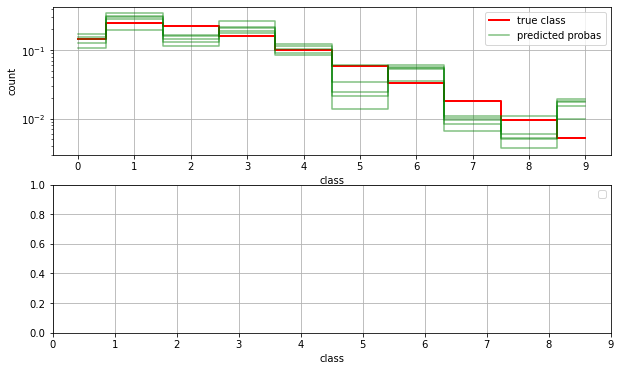

In [32]:
true_spectrum = d_evaluate.spectrum_from_labels(true_labels)
# pred_spectrum = d_evaluate.spectrum_from_probas(predicted_probas)

pred_spectra = [d_evaluate.spectrum_from_probas(single_bs[1]) for single_bs in bs_bundle]

plot_spectrum(true_spectrum, pred_spectra, BINS, save=False);